In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

## Use original Data

In [36]:
patient_dev_smote = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/dev.csv')

patient_test = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/test.csv')

In [9]:
patient_X_dev_smote = patient_dev_smote.drop(columns='hospital_death')
patient_y_dev_smote = pd.DataFrame(patient_dev_smote['hospital_death'], index = patient_dev_smote.index)

patient_X_test_smote = patient_test.drop(columns='hospital_death')
patient_y_test_smote = pd.DataFrame(patient_test['hospital_death'], index = patient_test.index)

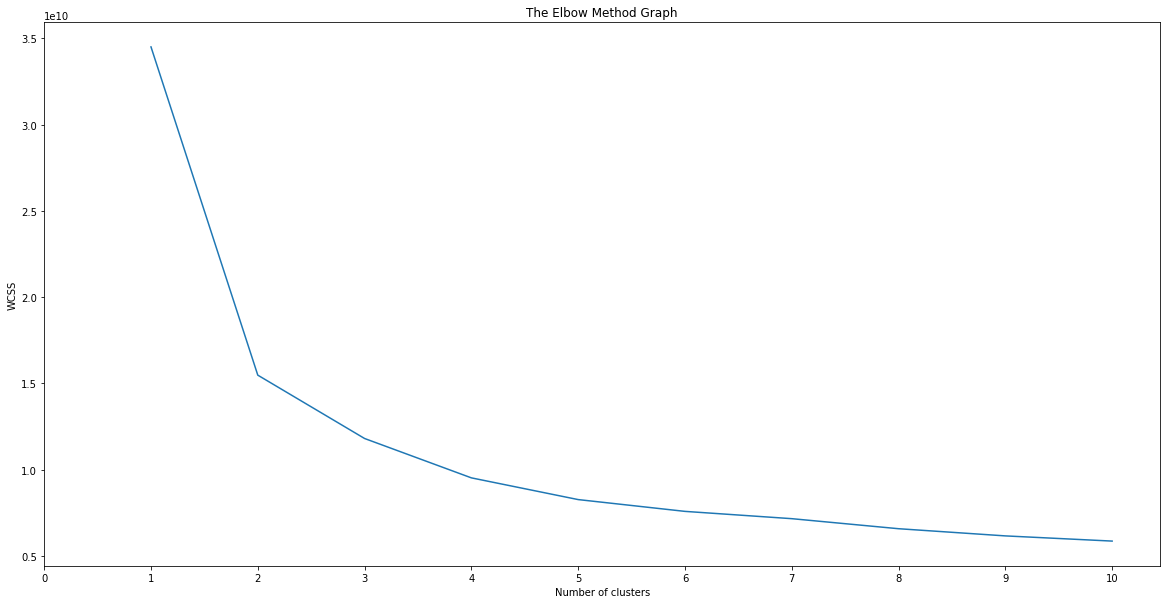

In [10]:
wcss=[]
plt.rcParams["figure.figsize"] = (20,10)
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=100, n_init=10,random_state=42)
     kmeans.fit(patient_X_dev_smote)
     wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(0, 11, step=1))
plt.ylabel('WCSS')
plt.show()

* From the graph above, we would like to choose 2 as the number the cluster.

In [11]:
kmeans_2 = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans = pd.DataFrame(kmeans_2.fit_predict(patient_X_dev_smote), 
    index = patient_X_dev_smote.index)


In [21]:
y_kmeans[0].corr(patient_y_dev_smote['hospital_death'])

-0.16215795849502135

## Use data from PCA

In [22]:
patient_dev_smote_pca95 = pd.read_pickle('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/dev_smote_pca95.pkl')
patient_X_dev_smote_pca95 = patient_dev_smote_pca95.drop(columns='hospital_death')
patient_y_dev_smote_pca95 = pd.DataFrame(patient_dev_smote_pca95['hospital_death'], index = patient_dev_smote_pca95.index)

patient_test_smote_pca95 = pd.read_pickle('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/test_smote_pca95.pkl')
patient_X_test_smote_pca95 = patient_test_smote_pca95.drop(columns='hospital_death')
patient_y_test_smote_pca95 = pd.DataFrame(patient_test_smote_pca95['hospital_death'], index = patient_test_smote_pca95.index)


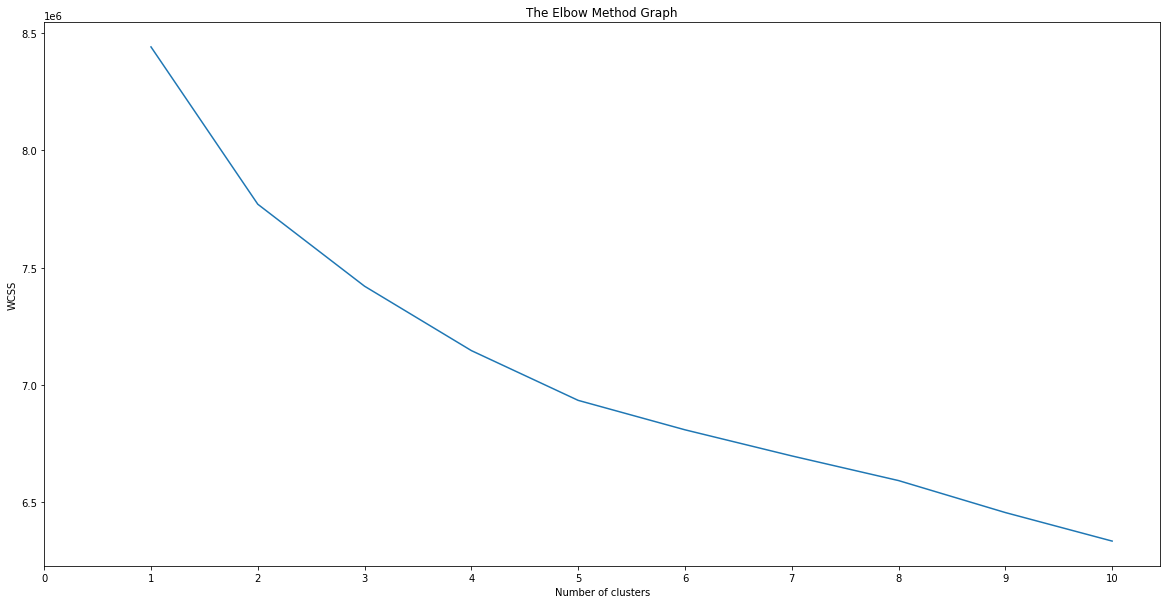

In [23]:
wcss=[]
plt.rcParams["figure.figsize"] = (20,10)
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=100, n_init=10,random_state=42)
     kmeans.fit(patient_X_dev_smote_pca95)
     wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(0, 11, step=1))
plt.ylabel('WCSS')
plt.show()

* From the graph above, we would like to choose 2 as the number the cluster.

In [34]:
kmeans_5 = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans_5 = pd.DataFrame(kmeans_5.fit_predict(patient_X_dev_smote_pca95), 
    index = patient_X_dev_smote_pca95.index)



# patient_dev_smote_pca95_kmeans = patient_X_dev_smote_pca95.copy()
# patient_dev_smote_pca95_kmeans['cluster'] = y_kmeans
# patient_dev_smote_pca95_kmeans['hospital_death'] = patient_y_dev_smote_pca95
# patient_dev_smote_pca95_kmeans.to_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/dev_smote_pca95_kmeans.pkl')

In [35]:
y_kmeans_5[0].corr(patient_y_dev_smote_pca95['hospital_death'])

0.1923362517554312